In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
w=1#initial start value of gradient
b=0#initial start value of y-ntercept
hyper_param = 1.5
L=0.0001#learning ratetry playing around with the value to see which ones converge
epoch=100#define whatever number of epochs you want but mind both efficiency and accuracy issues
epoch_error_list=[]
epoch_count_list=[]

In [21]:
from google.colab import files
uploaded=files.upload()

Saving data.csv to data (2).csv


In [0]:
data=pd.read_csv('data.csv',header=0)

In [0]:
X=data['size_in_sq_ft']
Y=data['price_x1000_sh']
N=float(len(X))

In [0]:
def regularized_mse(N,Y,Y_hat):#the regularized MSE function for error computation
  return ((2/N)*sum(Y-Y_hat)**2)-(hyper_param*abs(w))

In [0]:
def gradient_descent_fit(w,b,N,L):#main function i.e. gradient descent to learn the line of best fit
  epoch_error_list=[]
  epoch_count_list=[]
  for i in range(epoch):#loop as many times as the epochs you want
    Y_hat = w*X+b
    #compute and arrest error for every iteration
    epoch_count_list=epoch_count_list[:]#trick the list to get its instace
    epoch_count_list.append(i)
    epoch_error=regularized_mse(N,Y,Y_hat)
    epoch_error_list=epoch_error_list[:]
    epoch_error_list.append(epoch_error)
    #minimize the regularized error function by computing partial derivatives
    D_w=((-2/N)*sum(X*(Y-Y_hat)))-(hyper_param*(w/abs(w)))
    D_b=((-2/N)*sum(Y-Y_hat))-(hyper_param*(w/abs(w)))
    #Apply gradient descent formular to update both m and c into new values
    w=w-(L * D_w)
    b=b-(L * D_b)
  #you can print the final m and c after all iterations are done
  print("final w is: ",w," and final b is: ",b)
  #return final predicted value of Y-dependent variable
  return Y_hat,epoch_count_list,epoch_error_list

In [26]:
#call gradient descent fit function
returned_params=gradient_descent_fit(w,b,N,L)
y_predicted=returned_params[0]
total_epochs=returned_params[1]
all_epoch_errors=returned_params[2]

final w is:  1.4792065470906215  and final b is:  0.030142728622830656


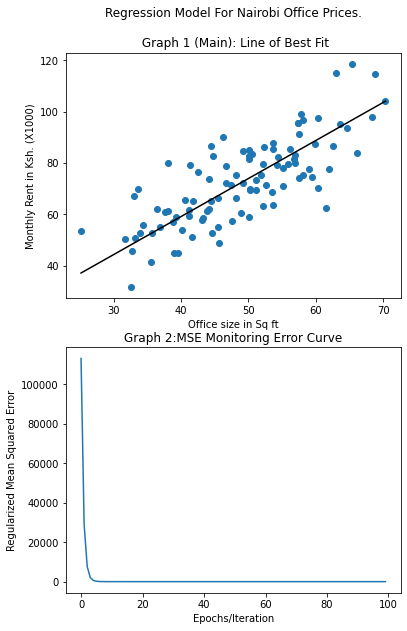

In [27]:
#create plot for both line of best fit and error reduction graphs
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw={'top':2})
ax1.set(xlabel="Office size in Sq ft")
ax1.set(ylabel="Monthly Rent in Ksh. (X1000)")
ax1.set_title("Regression Model For Nairobi Office Prices.\n\n Graph 1 (Main): Line of Best Fit")
ax1.scatter(X,Y)

ax1.plot([min(X),max(X)],[min(y_predicted),max(y_predicted)],color='black')
ax2.set_title("Graph 2:MSE Monitoring Error Curve")
ax2.set(xlabel="Epochs/Iteration")
ax2.set(ylabel="Regularized Mean Squared Error")
ax2.plot(total_epochs,all_epoch_errors)

In [0]:
#Destroy the used lists to prevent recarpetting on append
epoch_count_list.clear()
epoch_error_list.clear()